In [3]:
import pandas as pd

url = "https://huggingface.co/datasets/adityaswami89/Salesdata/resolve/main/sales_data_sample.csv"

# Specify encoding
df = pd.read_csv(url, encoding='ISO-8859-1')

print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [7]:
import pandas as pd
import sqlite3

df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')

print(df.head())

df = df[['PRODUCTLINE', 'QUANTITYORDERED', 'PRICEEACH']]
df.rename(columns={
    'PRODUCTLINE': 'product',
    'QUANTITYORDERED': 'quantity',
    'PRICEEACH': 'price'
}, inplace=True)

conn = sqlite3.connect('sales_data.db')
df.to_sql('sales', conn, if_exists='replace', index=False)
conn.close()

print("CSV successfully converted to SQLite database.")

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN


Sales Summary:
            product  total_qty     revenue
0      Classic Cars      33992  2968546.40
1       Motorcycles      11663   971086.29
2            Planes      10727   877942.21
3             Ships       8127   677940.40
4            Trains       2712   203804.26
5  Trucks and Buses      10777   947355.18
6      Vintage Cars      21069  1644212.05


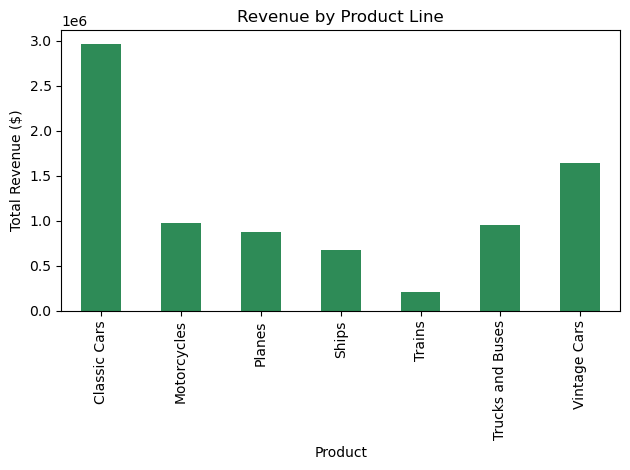

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
'''

df_summary = pd.read_sql_query(query, conn)
conn.close()

print("\nSales Summary:")
print(df_summary)

df_summary.plot(kind='bar', x='product', y='revenue', legend=False, color='seagreen')
plt.title("Revenue by Product Line")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()

plt.savefig("sales_chart.png")
plt.show()